# N Body Problem

Nbody_shi

Direct N-body solver: for each step, the algorithm evaluates the force acted on any particles by all the other particles. RUNNING TIME SCALES AS $N^2$ 

$$G = 1$$
$$\textbf{f}_i=\sum_{j\neq i} \frac{m_im_j}{|\textbf{r}_{ij}|^3}\textbf{r}_{ij}$$

4^th order Hermite algorithm: error scales as dt^4

$$\textbf{x}_{i+1}=\textbf{x}_i+\textbf{v}_idt+\frac{1}{2}\textbf{a}_idt^2+\frac{1}{3!}\textbf{J}_idt^3+\frac{1}{4!}\textbf{S}_idt^4$$

$$\textbf{v}_{i+1}=\textbf{v}_i+\textbf{a}_idt+\frac{1}{2}\textbf{J}_idt^2+\frac{1}{3!}\textbf{S}_idt^3+\frac{1}{4!}\textbf{C}_idt^4$$

$$\textbf{a}_{i+1}=\textbf{a}_i+\textbf{J}_idt+\frac{1}{2}\textbf{S}_idt^2+\frac{1}{3!}\textbf{C}_idt^3+O(dt^4)$$

$$\textbf{J}_{i+1}=\textbf{J}_i+\textbf{S}_idt+\frac{1}{2}\textbf{C}_idt^2+O(dt^3)$$


where $\textbf{J}$ is the jerk, $\textbf{S}$ the snap (jounce), $\textbf{C}$ the crakle. The jerk can be evaluated knowing the position and the velocity vector only: 

$$\textbf{a}_i=\sum_{j\neq i} \frac{m_j}{|\textbf{r}_{ij}|^3}\textbf{r}_{ij}$$
$$\textbf{J}_i=\frac{d}{dt}\textbf{a}_i=\sum_{j\neq i}m_j\left( \frac{\textbf{v}_{ij}}{|\textbf{r}_{ij}|^3}-3\frac{\textbf{r}_{ij}}{|\textbf{r}_{ij}|^4}\frac{d}{dt}|\textbf{r}_{ij}|\right)$$

but $|\textbf{r}_{ij}|=\sqrt{\textbf{r}_{ij}\cdot \textbf{r}_{ij}}$ thus: 

$$\textbf{J}_i=\sum_{j\neq i}\frac{m_j}{|\textbf{r}_{ij}|^3}\left(\textbf{v}_{ij}-3\frac{\textbf{r}_{ij}}{|\textbf{r}_{ij}|}\frac{2(\textbf{v}_{ij}\cdot \textbf{r}_{ij})}{2|\textbf{r}_{ij}|}\right)=\sum_{j\neq i}\frac{m_j}{|\textbf{r}_{ij}|^3}\left(\textbf{v}_{ij}-3\frac{\textbf{r}_{ij}(\textbf{v}_{ij}\cdot \textbf{r}_{ij})}{|\textbf{r}_{ij}|^2}\right)$$


ALGORITHM

Step 1: PREDICTOR evaluates $\textbf{a}_i$ and $\textbf{J}_i$ from initial position and velocity and computes $\textbf{x}_{i+1}$ and $\textbf{v}_{i+1}$ to the order 2. 

Step 2: EVALUATOR computes $\textbf{C}_i$ and $\textbf{S}_i$ inverting the last two equations

Step 3: CORRECTOR computes higher order $\textbf{x}_i+1$ and $\textbf{v}_i+1$ by plugging snap and crakle in the Taylor expansion. 

How to decide $dt$? For each particle the algorithm computes $|\frac{\textbf{x}_{ij}}{\textbf{v}_{ij}}|$ and $|\frac{\textbf{x}_{ij}}{\textbf{a}_{ij}}|^{\frac{1}{2}}$, which are times. Then it takes the minimum between this two and multyplies it by an accuracy parameter $d\ll 1$. A good choice is $d=0.03$.


Algorithm to compute Snap ($\mathbf{S}_i$) and Crackle ($\mathbf{C}_i$):

Step 1: Predictor
$$
\mathbf{x}_{i+1}^{(p)} = \mathbf{x}_i + \mathbf{v}_i dt + \frac{1}{2} \mathbf{a}_i dt^2 + \frac{1}{6} \mathbf{J}_i dt^3
$$
$$
\mathbf{v}_{i+1}^{(p)} = \mathbf{v}_i + \mathbf{a}_i dt + \frac{1}{2} \mathbf{J}_i dt^2
$$

Step 2: Evaluate new acceleration and jerk at predicted positions:
$$
\mathbf{a}_{i+1}, \mathbf{J}_{i+1} \text{ at } \mathbf{x}_{i+1}^{(p)}, \mathbf{v}_{i+1}^{(p)}
$$

Step 3: Compute Snap and Crackle
$$
\mathbf{S}_i = \frac{2}{dt^2} \Big(\mathbf{a}_{i+1} - \mathbf{a}_i - \mathbf{J}_i dt\Big)
$$
$$
\mathbf{C}_i = \frac{6}{dt^3} \Big(\mathbf{J}_{i+1} - \mathbf{J}_i - \mathbf{S}_i dt\Big)
$$

Step 4: Corrector (update positions and velocities to 4th order)
$$
\mathbf{x}_{i+1} = \mathbf{x}_i + \mathbf{v}_i dt + \frac{1}{2} \mathbf{a}_i dt^2 + \frac{1}{6} \mathbf{J}_i dt^3 + \frac{1}{24} \mathbf{S}_i dt^4
$$
$$
\mathbf{v}_{i+1} = \mathbf{v}_i + \mathbf{a}_i dt + \frac{1}{2} \mathbf{J}_i dt^2 + \frac{1}{6} \mathbf{S}_i dt^3 + \frac{1}{24} \mathbf{C}_i dt^4
$$

This yields 4th-order accurate updates for the N-body system.


### ADAPTIVE TIMESTEP

The adaptive timestep for particle $i$ can be estimated using the Aarseth criterion:
$$
\Delta t_i
=
\eta
\sqrt{
\frac{
|\mathbf a_i|\,|\mathbf{\ddot a}_i| + |\mathbf{\dot a}_i|^2
}{
|\mathbf{\dot a}_i|\,|\mathbf{\ddot a}_i| + |\mathbf{\ddot a}_i|^2
}
}
$$
where $\mathbf a_i$ is the acceleration and $\mathbf{\dot a}_i$ is the jerk. $\eta\sim 0.01–0.2$ controls accuracy.

A commonly used simplified form is:
$$
\Delta t_i
=
\eta
\sqrt{
\frac{|\mathbf a_i|}{|\mathbf{\dot a}_i|}
}
$$

An alternative adaptive timestep based on the local dynamical time is:
$$
\Delta t_i
\sim
\eta
\sqrt{
\frac{r_i}{|\mathbf a_i|}
}
$$
The timestep is a fraction of the orbital or free-fall timescale.
This can also be expressed in terms of the local density:
$$
\Delta t_i
\sim
\eta\, t_{\mathrm{dyn}},
\qquad
t_{\mathrm{dyn}}
\sim
\frac{1}{\sqrt{G\rho}}.
$$
A weaker constraint on the timestep is the Courant-like criterion:
$$
\Delta t_i
<
\eta
\frac{|\mathbf v_i|}{|\mathbf a_i|}.
$$


# GLOBAL ADAPTIVE VS LOCAL ADAPTIVE: Individual block (hierarchical) timesteps using the Aarseth acceleration–jerk criterion

A global adaptive timestep is not a good choice for a 4th-order Hermite N-body code because it is fundamentally mismatched to the physics and numerics of gravitational N-body systems. In one simulation you typically have, simultaneously:
- Wide, slow orbits
- Tight binaries
- Close encounters / flybys

The shortest timescale sets the global timestep: $\Delta t_\text{global}\leq \min ⁡\Delta t_i$. One tight binary forces every particle to take tiny steps, and cost scales catastrophically: $CPU\propto T_\text{sim}/\Delta t_\text{min} N^2$. Most particles are vastly over-integrated.

Hermite integrators are instead local in nature. Each particle advances on its own optimal timescale.
Using a global timestep wastes the local force information and negates the main advantage of Hermite integrators.


When is a global timestep acceptable?
- Collisionless systems
- No close encounters
- Symplectic integrators (leapfrog)
- Softened gravity
- Nearly uniform timescales


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass, field


In [4]:
### --- UNITS --- ###


G_cgs = 6.67259 * 10**-8         # G in cgs
c_cgs = 2.99 * 10**10            # cm/s
M_sun = 1.9891 * 10**33      # solar mass in g
R_sun = 6.9598 * 10**10      # solar radius in cm 
M_earth = 5.976 * 10**27     # earth mass in g
R_earth = 6.378 * 10**8      # earth radius in cm
ly = 9.463 * 10**17          # light year in cm
parsec = 3.086 * 10**18      # parsec in cm
AU = 1.496 * 10**13          # astronomical unit in cm
km = 1.e5
hour = 3600
day = 86400
yr = 3.156*10**7

# G = 1
# mass in M_sun units
# length in AU units

# --- Internal units ---
M_unit = M_sun
L_unit = AU

T_unit = np.sqrt(L_unit**3 / (G_cgs * M_unit))  # seconds

def length_IU(cm):
    return cm / L_unit

def length_cgs(x):
    return x * L_unit

def mass_IU(g):
    return g / M_unit

def mass_cgs(x):
    return x * M_unit

def time_IU(s):
    return s / T_unit

def time_cgs(x):
    return x * T_unit

In [5]:
year_IU = time_IU(31557600)


In [ ]:
@dataclass
class Body:
    name: str = None
    mass: float = None
    radius: float = None
    initial_position: np.ndarray = None
    initial_velocity: np.ndarray = None

    def __post_init__(self):
        self.initial_position = np.asarray(self.initial_position, dtype=float)
        self.initial_velocity = np.asarray(self.initial_velocity, dtype=float)

        if self.initial_position.shape != (3,):
            raise ValueError("initial_position must be a 3-element array")

        if self.initial_velocity.shape != (3,):
            raise ValueError("initial_velocity must be a 3-element array")

        self.x = [self.initial_position.copy()]
        self.v = [self.initial_velocity.copy()]
        self.t = [0]


In [55]:

def make_binary_system(m_1,m_2,a,e,i,phi): 

    M = m_1 + m_2
    mu = m_1*m_2 / M

    E = - M * mu / (2*a)
    L = mu * np.sqrt(M * a * (1 - e**2))

    # Relative distance
    r_peri = a * (1-e)
    #r_apo = a * (1+e)

    # Velocity computed at the apocenter (where it is orthogonal to the position vector)
    # Vis Viva formula
    v = L / (mu*r_peri)

    # Move in 3D
    r_peri = np.array([r_peri,0,0])
    v = np.array([0,v,0])

    # Positions of the two body in the CM frame
    r_1 = m_2 / M * r_peri
    r_2 = -m_1 / M * r_peri

    v_1 = m_2 / M * v
    v_2 = -m_1 / M * v

    print(m_1*v_1 + m_2 * v_2)

    # yz plane is the plane of the sky, we look from x
    # Rotation matrix
    cphi, sphi = np.cos(phi), np.sin(phi)
    ci, si = np.cos(i), np.sin(i)

    R = np.array([
        [ cphi,       -sphi,        0.0 ],
        [ ci*sphi,    ci*cphi,     -si  ],
        [ si*sphi,    si*cphi,      ci  ]
    ])

    r_1 = R @ r_1
    r_2 = R @ r_2
    v_1 = R @ v_1
    v_2 = R @ v_2

    body_1 = Body(mass=m_1,initial_position=r_1,initial_velocity=v_1)
    body_2 = Body(mass=m_2,initial_position=r_2,initial_velocity=v_2)

    V_CM = (m_1 * v_1 + m_2 * v_2) / M
    print("Center of mass motion: ",V_CM)

    return body_1, body_2


In [56]:


def compute_acc_and_jerk(b, bodies):
    """Compute acceleration and jerk on body b from bodies."""
    a = np.zeros(3)
    j = np.zeros(3)

    for bb in bodies:
        if bb is b:
            continue

        r = bb.x[-1] - b.x[-1]
        v = bb.v[-1] - b.v[-1]

        r2 = np.dot(r, r)
        r1 = np.sqrt(r2)
        r3 = r2 * r1

        a += bb.mass * r / r3
        j += bb.mass * (v / r3 - 3.0 * r * np.dot(r, v) / (r2 * r3))

    return a, j


def evolve_system(bodies, t_end, dt=None, adapt_dt=True, eta=0.03):
    """
    4th-order Hermite integrator with global adaptive timestep.
    """

    if not adapt_dt and dt is None:
        raise ValueError("Provide dt when adapt_dt=False")

    t = 0.0
    eps = 1e-12

    while t < t_end:

        # --------------------------------------------------
        # STEP 0: choose global timestep
        # --------------------------------------------------
        if adapt_dt:
            dt = np.inf
            for b in bodies:
                a, j = compute_acc_and_jerk(b, bodies)
                a_norm = np.linalg.norm(a)
                j_norm = np.linalg.norm(j)

                if j_norm > 0:
                    dt_i = eta * np.sqrt(a_norm / (j_norm + eps))
                    dt = min(dt, dt_i)

        # --------------------------------------------------
        # STEP 1: predictor
        # --------------------------------------------------
        for b in bodies:
            b.a, b.j = compute_acc_and_jerk(b, bodies)

            b.x_pred = b.x[-1] + b.v[-1] * dt + 0.5 * b.a * dt**2 + (1.0 / 6.0) * b.j * dt**3
            b.v_pred = b.v[-1] + b.a * dt + 0.5 * b.j * dt**2

        # --------------------------------------------------
        # STEP 2: evaluate forces at predicted positions
        # --------------------------------------------------
        for b in bodies:
            a_new = np.zeros(3)
            j_new = np.zeros(3)

            for bb in bodies:
                if bb is b:
                    continue

                r = bb.x_pred - b.x_pred
                v = bb.v_pred - b.v_pred

                r2 = np.dot(r, r)
                r1 = np.sqrt(r2)
                r3 = r2 * r1

                a_new += bb.mass * r / r3
                j_new += bb.mass * (v / r3 - 3.0 * r * np.dot(r, v) / (r2 * r3))

            b.a_new = a_new
            b.j_new = j_new

        # --------------------------------------------------
        # STEP 3: compute snap and crackle
        # --------------------------------------------------
        for b in bodies:
            b.s = (2.0 / dt**2) * (b.a_new - b.a - b.j * dt)
            b.c = (6.0 / dt**3) * (b.j_new - b.j - b.s * dt)

        # --------------------------------------------------
        # STEP 4: corrector
        # --------------------------------------------------
        for b in bodies:
            x_new = b.x_pred + (1.0 / 24.0) * b.s * dt**4
            v_new = (
                b.v_pred
                + (1.0 / 6.0) * b.s * dt**3
                + (1.0 / 24.0) * b.c * dt**4
            )

            b.x.append(x_new)
            b.v.append(v_new)
            b.t.append(t + dt)

        t += dt



        
            

In [161]:

# Star mass
m_star = 1.0

# Planet parameters: (mass, semi-major axis, eccentricity, inclination, longitude of ascending node)
planet_data = [
    (0.01, 1.0, 0.0, 0.0, 0.0),             # Planet 1
    (0.01, 2.0, 0.0, 0.0, np.pi),           # Planet 2
    (0.1, 1.5, 0.01, np.pi/16, np.pi/3)     # Planet 2
]

# Start with the star at the origin
r_star = np.zeros(3)
v_star = np.zeros(3)

bodies = []

for m_planet, a, e, i, phi in planet_data:
    # Compute binary (star + planet) in CM frame
    body_star, body_planet = make_binary_system(m_1=m_star, m_2=m_planet, a=a, e=e, i=i, phi=phi)
    
    # Shift star and planet by current star CM position
    body_star.initial_position += r_star
    body_star.initial_velocity += v_star
    body_planet.initial_position += r_star
    body_planet.initial_velocity += v_star
    
    # Update CM position and velocity of the star after adding planet
    r_star = body_star.initial_position
    v_star = body_star.initial_velocity
    
    # Save bodies
    bodies.append(body_planet)


# Finally append the star
bodies.append(Body(mass=m_star,initial_position=r_star,initial_velocity=v_star))


[0. 0. 0.]
Center of mass motion:  [0. 0. 0.]
[0.00000000e+00 8.67361738e-19 0.00000000e+00]
Center of mass motion:  [-9.53430666e-35 -8.58773998e-19  0.00000000e+00]
[0.00000000e+00 1.38777878e-17 0.00000000e+00]
Center of mass motion:  [0.00000000e+00 6.30808537e-18 0.00000000e+00]


In [162]:
evolve_system(bodies=bodies,t_end=40,eta=0.0003,)#adapt_dt=False,dt=0.0001)

In [143]:
#star.x

/tmp/ipykernel_106312/4283454949.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('jet', len(bodies))  # color map for different bodies


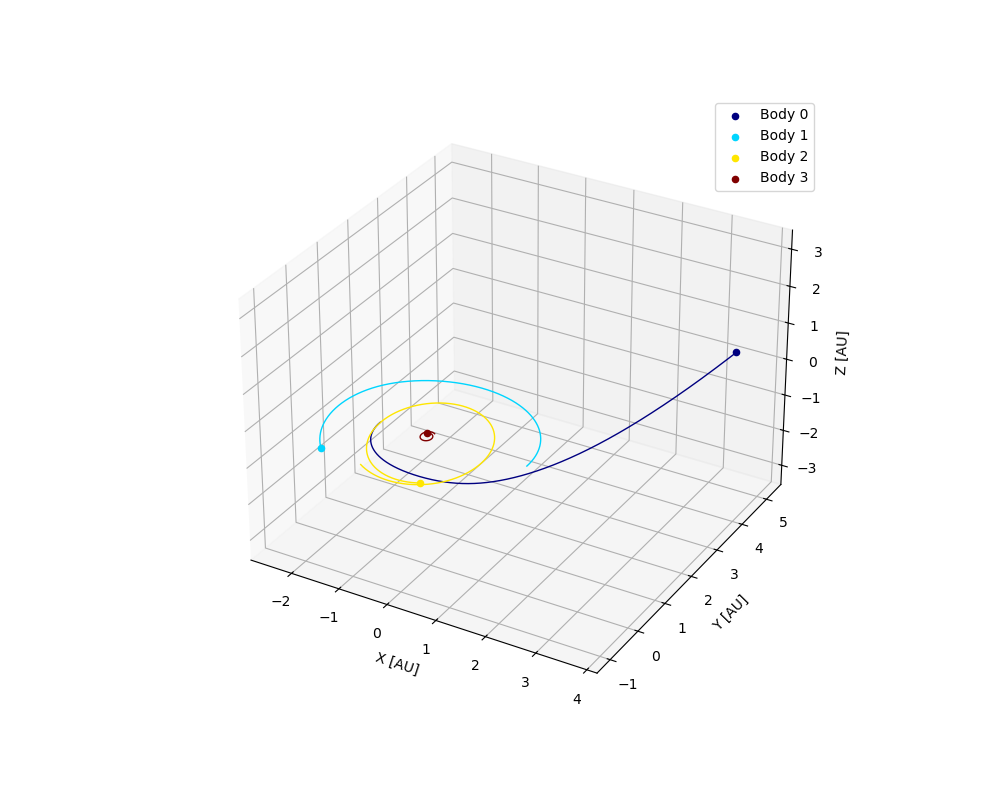

In [164]:
%matplotlib widget
plot_3d_orbits(bodies, t_max=10,step_marker=100)

In [148]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_orbits(bodies, t_max, step_marker=100, figsize=(10,8), colors=None):
    """
    Plot 3D orbits of multiple bodies up to a given time t_max.

    Parameters
    ----------
    bodies : list of Body
        List of Body objects to plot. Each Body must have attributes `.x` and `.t`.
    t_max : float
        Maximum time to plot.
    step_marker : int
        Interval of timesteps to plot small markers along the orbit.
    """
    import numpy as np
    import matplotlib.pyplot as plt

    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111, projection='3d')

    if colors is None:
        colors = plt.cm.get_cmap('jet', len(bodies))  # color map for different bodies

    all_positions = []

    for i, b in enumerate(bodies):
        times = np.array(b.t)  # shape (N,)
        positions = np.array(b.x)  # shape (N,3)

        # Find index where time <= t_max
        idx_max = np.searchsorted(times, t_max, side='right')
        positions = positions[:idx_max]

        all_positions.append(positions)

        # Full orbit line up to t_max
        ax.plot(positions[:,0], positions[:,1], positions[:,2], linestyle='-', lw=1, color=colors(i))

        # Big marker at final position
        if len(positions) > 0:
            ax.scatter(positions[-1,0], positions[-1,1], positions[-1,2],
                       color=colors(i), s=20, marker='o', label=f'{b.name or f"Body {i}"}')

    # Labels and legend
    ax.set_xlabel('X [AU]')
    ax.set_ylabel('Y [AU]')
    ax.set_zlabel('Z [AU]')
    ax.legend()

    # Equal aspect ratio
    all_positions = np.concatenate(all_positions)
    max_range = (all_positions.max(axis=0) - all_positions.min(axis=0)).max() / 2.0
    mid = (all_positions.max(axis=0) + all_positions.min(axis=0)) / 2.0

    ax.set_xlim(mid[0] - max_range, mid[0] + max_range)
    ax.set_ylim(mid[1] - max_range, mid[1] + max_range)
    ax.set_zlim(mid[2] - max_range, mid[2] + max_range)

    plt.show()

